## Variables to Set

In [1]:
padded_lcs_path = './Padded_lc' #Where the padded light curves are stored
what_scaler = 'standard' #Scaler to use : 'minmax','standard','robust'
som_x = None #x dimension of SOM, if set to None, then please set som_y to None also
som_y = None #Refer to above, if both are None, then the value becomes sqrt(sqrt(len(padded_lcs)))
learning_rate = 0.1 #Learning Rate of SOM
sigma = 1 #Influence on Neighboring Nodes of SOM
topology = 'rectangular' #Topology of SOM (can use hexagonal also)
neighborhood_function='gaussian' #Neighborhood function
epochs = 50000 #Number of epochs to train SOM
save_som = False #Whether to save the SOM
model_save_path = './' #Where to save the SOM
visualize_SOM = True #Whether to plot metrics of the SOM (for now, heat map, average clusters and number of clusters)
dba = True #Whether to use dynamic barymetric average to visualize the average
figsize = (10,10) #Figure size of the plots
clusters_save_path = './' #Where to save the clusters map
random_seed = 42 #Random seed
cmap = 'YlOrRd' #Color map for heatmap
save_figs = True #Whether to save the plots
fig_save_path = './' ##Where to save the plots (Note that the program creates a folder called Plots in the directory)
clusters_color = 'tab:blue' #The color of the clusters histogram
have_science_plots = True #Will use science style for plot if true (Need scienceplots package also)
pca_init = True #Initialized weights by pca
use_gradient_cluster = True #Whether to use the gradient clustering algorithm on the SOM
plot_frequency = 100 #How frequent to sample errors for model training
stat = 'both' #You can set it to just quantization error or topographical error (with just q or t)

## Import 

In [2]:
from Clustering_with_SOM import load_padded_light_curves,scale_curves,Train_SOM,Assign_Cluster_Labels,\
                                Plot_SOM_Scaled_Average,SOM_Nodes_Map,SOM_Clusters_Histogram,Train_SOM_with_stats,\
                                Gradient_Cluster_Map,plotStarburstMap,outliers_detection,plot_training
#from Visualizing_Clusters import load_cluster_map_and_unpadded_lcs (Only uncomment if you will be doing the same testing as below)
import matplotlib.pyplot as plt
if have_science_plots:
    import scienceplots
    plt.style.use(['science','no-latex'])

## Training SOM and Visualizing Results

### Loading and Scaling Light Curves for use in SOM

In [3]:
ids,padded_lcs = load_padded_light_curves(padded_lcs_path)
scaled_curves = scale_curves(padded_lcs,what_scaler)

Loading Padded Curves: 997it [00:08, 112.39it/s]
Scaling Curves: 100%|███████████████████████████████████████████████████████████████| 997/997 [00:02<00:00, 373.70it/s]


### Making the SOM

In [4]:
som_model, q_error,t_error, indices_to_plot = Train_SOM_with_stats(scaled_curves,som_x,som_y,learning_rate,sigma,topology,neighborhood_function,epochs,save_som,\
                      model_save_path,random_seed,stat,pca_init,plot_frequency)

Model Training: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:18<00:00, 18.07s/it]

quantization error: 9.432927572907852


### Creating the Clusters

In [6]:
if use_gradient_cluster:
    clusters_df = Gradient_Cluster_Map(som_model,scaled_curves,ids)
else:
    clusters_df = Assign_Cluster_Labels(som_model,scaled_curves,ids)
clusters_df.to_csv(f'{clusters_save_path}Clusters_Map.csv',index = False)
print('Clusters Saved')

Clusters Saved


### Visualizing SOM Heatmap, Number of Curves in Each Cluster and the Scaled SOM Average

Creating Plots: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:15<00:00,  1.21s/it]


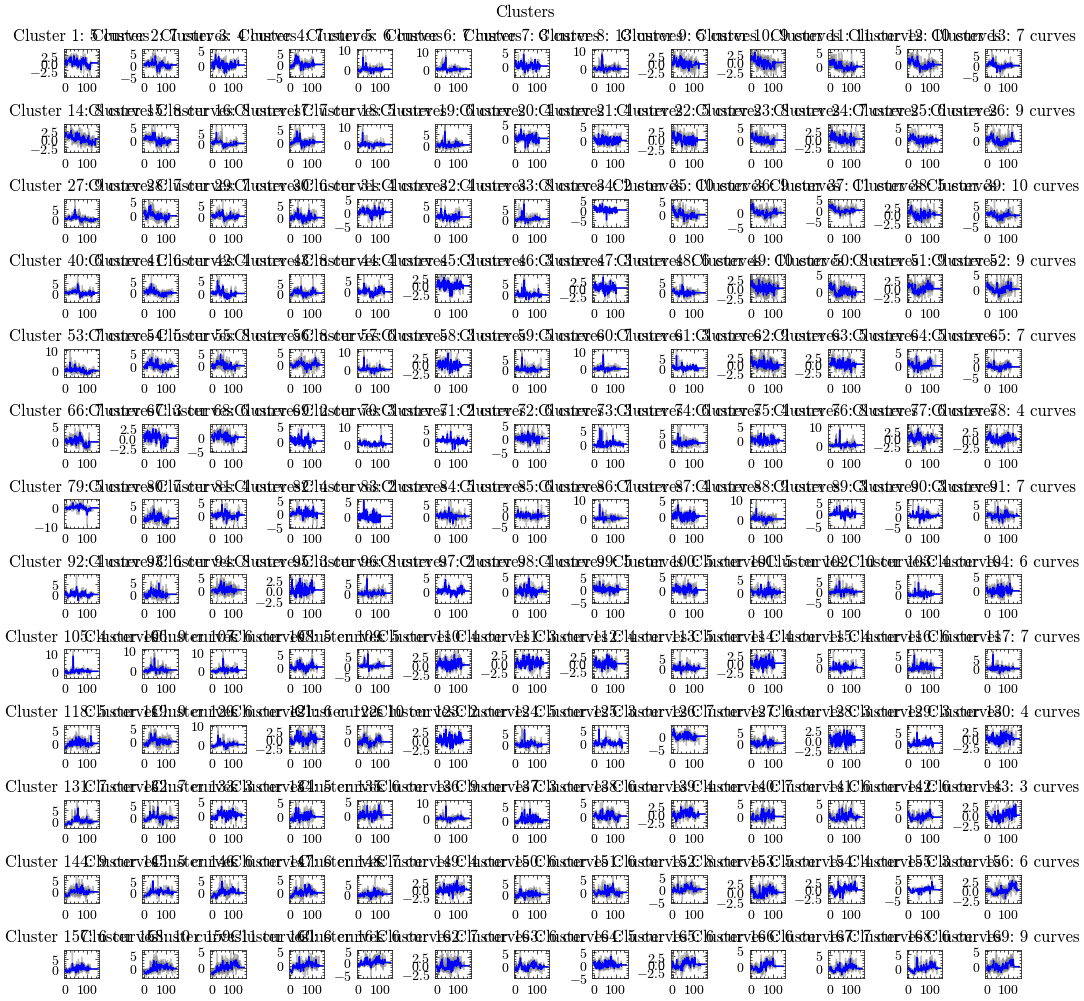

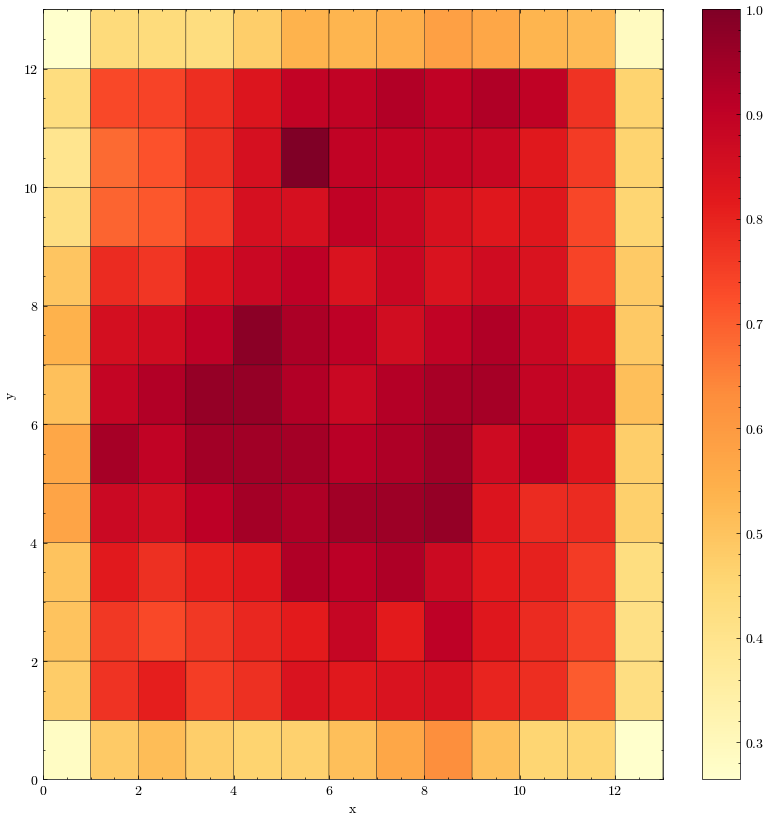

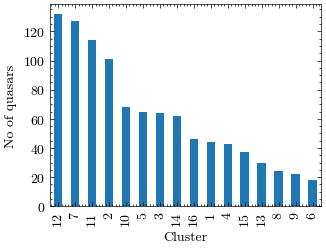

In [7]:
#This can create the scaled and averaged plots if turned on
if visualize_SOM:
    plot_training(q_error,'Quantization Error',plot_frequency,indices_to_plot,figsize,save_figs,fig_save_path)
    plot_training(t_error,'Topographic Error',plot_frequency,indices_to_plot,figsize,save_figs,fig_save_path)
    Plot_SOM_Scaled_Average(som_model,scaled_curves,dba,figsize,save_figs,fig_save_path)
    SOM_Nodes_Map(som_model,figsize,cmap,save_figs,fig_save_path)
    SOM_Clusters_Histogram(clusters_df,clusters_color,save_figs,fig_save_path)

## Extra

### Getting Stats for the training of the SOM

Checking how the SOM trains with different learning rates

In [ ]:
som_model_stat, q_error, t_error = Train_SOM_with_stats(scaled_curves,som_x,som_y,learning_rate,sigma,topology,neighborhood_function,10000,save_som,\
                      model_save_path,random_seed,stat='both')

In [ ]:
som_model_stat_2, q_error_2, t_error_2 = Train_SOM_with_stats(scaled_curves,som_x,som_y,0.01,sigma,topology,neighborhood_function,10000,save_som,\
                      model_save_path,random_seed,stat = 'both')

In [ ]:
som_model_stat_3, q_error_3, t_error_3 = Train_SOM_with_stats(scaled_curves,som_x,som_y,0.5,sigma,topology,neighborhood_function,10000,save_som,\
                      model_save_path,random_seed,stat = 'both')

Evaluating SOM: 100%|████████████████████████████████████████████████████████████| 10000/10000 [05:53<00:00, 28.27it/s]


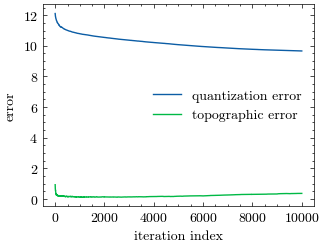

Evaluating SOM: 100%|████████████████████████████████████████████████████████████| 10000/10000 [06:18<00:00, 26.43it/s]


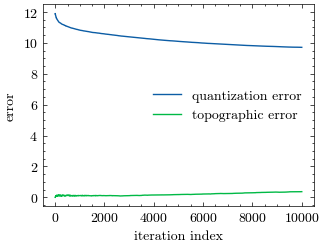

In [4]:
som_model_stat, q_error, t_error = Train_SOM_with_stats(scaled_curves,som_x,som_y,learning_rate,sigma,topology,neighborhood_function,10000,save_som,\
                      model_save_path,random_seed,stat='both',pca_init = False)
som_model_stat_2, q_error_2, t_error_2 = Train_SOM_with_stats(scaled_curves,som_x,som_y,learning_rate,sigma,topology,neighborhood_function,10000,save_som,\
                      model_save_path,random_seed,stat = 'both',pca_init = True)

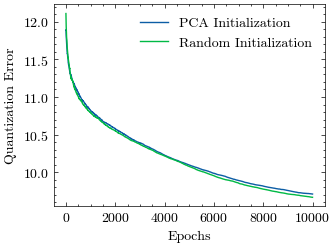

In [11]:
#Graphing the quantization error
plt.plot(range(len(q_error_2)),q_error_2,label = 'PCA Initialization')
plt.plot(range(len(q_error)),q_error,label = 'Random Initialization')
plt.xlabel('Epochs')
plt.ylabel('Quantization Error')
plt.legend()

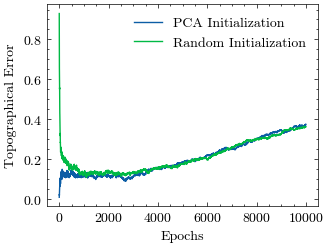

In [12]:
#Graphing the topological error
plt.plot(range(len(t_error_2)),t_error_2,label = 'PCA Initialization')
plt.plot(range(len(t_error)),t_error,label = 'Random Initialization')
plt.xlabel('Epochs')
plt.ylabel('Topographical Error')
plt.legend()

In [ ]:
#Graphing the quantization error
plt.plot(range(len(q_error_2[1000:])),q_error_2[1000:],label = 'LR = 0.01')
plt.plot(range(len(q_error[1000:])),q_error[1000:],label = 'LR = 0.1')
#plt.plot(range(len(q_error_4[1000:])),q_error_4[1000:],label = r'$\sigma$ = 0.5')
plt.plot(range(len(q_error_3[1000:])),q_error_3[1000:],label = 'LR = 0.5')
plt.xlabel('Epochs')
plt.ylabel('Quantization Error')
plt.legend()

In [ ]:
#Graphing the topological error
plt.plot(range(len(t_error_2[1000:])),t_error_2[1000:],label = 'LR = 0.01')
plt.plot(range(len(t_error[1000:])),t_error[1000:],label = 'LR = 0.1')
#plt.plot(range(len(q_error_4[1000:])),q_error_4[1000:],label = r'$\sigma$ = 0.5')
plt.plot(range(len(t_error_3[1000:])),t_error_3[1000:],label = 'LR = 0.5')
plt.xlabel('Epochs')
plt.ylabel('Topographical Error')
plt.legend()

### Checking the Gradient Descent Clusters

In [9]:
import numpy as np
import pandas as pd
from minisom import MiniSom

In [120]:
som = MiniSom(6,6,len(scaled_curves[0]),learning_rate = learning_rate,sigma = sigma,\
                       topology = 'rectangular', neighborhood_function = neighborhood_function,random_seed=random_seed)

som_2 = MiniSom(12,12,len(scaled_curves[0]),learning_rate = learning_rate,sigma = sigma,\
                       topology = 'rectangular', neighborhood_function = neighborhood_function,random_seed=random_seed)
som_3 = MiniSom(6,6,len(scaled_curves[0]),learning_rate = learning_rate,sigma = 0.5,\
                       topology = 'rectangular', neighborhood_function = neighborhood_function,random_seed=random_seed)
som_4 = MiniSom(6,6,len(scaled_curves[0]),learning_rate = 0.5,sigma = sigma,\
                       topology = 'rectangular', neighborhood_function = neighborhood_function,random_seed=random_seed)
som_5 = MiniSom(6,6,len(scaled_curves[0]),learning_rate = learning_rate,sigma = 0.1,\
                       topology = 'rectangular', neighborhood_function = neighborhood_function,random_seed=random_seed)

som.train_random(scaled_curves,50000)
som_2.train_random(scaled_curves,50000)
som_3.train_random(scaled_curves,50000)
som_4.train_random(scaled_curves,50000)
som_5.train_random(scaled_curves,50000)

In [92]:
def outliers_detection(clusters_df,som,scaled_curves,ids,outlier_percentage = 0.2):
    #Detects outliers that aren't quantized well as a percentage of the clusters
    quantization_errors = np.linalg.norm(som.quantization(scaled_curves) - scaled_curves, axis=1)
    error_treshold = np.percentile(quantization_errors, 
                               100*(1-outliers_percentage)+5)
    outlier_ids = np.array(ids)[quantization_errors>error_treshold]
    outlier_cluster = []
    for i in range(len(clus.ID)):
        if str(clus.ID[i]) in outlier_ids:
            outlier_cluster.append(clus.Cluster[i])
    #Plot the number of outliers per cluster
    plt.figure()
    plt.hist(clus['Cluster'],bins = len(np.unique(clus.Cluster))-1,alpha = 0.35,label = 'Total number of clusters',edgecolor = 'k')
    plt.hist(outlier_cluster,bins = len(np.unique(clus.Cluster))-1,alpha = 0.35,label = 'outliers',edgecolor = 'k')
    plt.xlabel('Cluster')
    plt.ylabel('No of Quasars')
    plt.legend()
    #Plot the treshold for quantization error
    plt.figure()
    plt.hist(quantization_errors,edgecolor = 'k',label = f'Threshold = {outlier_percentage}')
    plt.axvline(error_treshold, color='k', linestyle='--')
    plt.legend()
    plt.xlabel('Quantization Error')
    plt.ylabel('No of Quasars')

In [99]:
clus = Gradient_Cluster_Map(som_2,scaled_curves,ids)
#clus = Assign_Cluster_Labels(som_2,scaled_curves,ids)

In [121]:
clus_3 = Gradient_Cluster_Map(som_3,scaled_curves,ids)
clus_4 = Gradient_Cluster_Map(som_4,scaled_curves,ids)
clus_1 = Gradient_Cluster_Map(som,scaled_curves,ids)
clus_5 = Gradient_Cluster_Map(som_5,scaled_curves,ids)

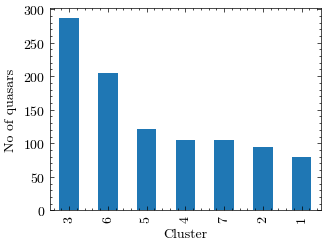

In [111]:
SOM_Clusters_Histogram(clus_1,clusters_color)

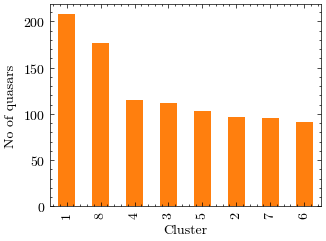

In [112]:
SOM_Clusters_Histogram(clus_3,'tab:orange')

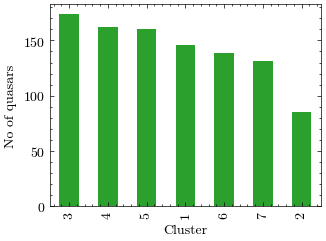

In [113]:
SOM_Clusters_Histogram(clus_4,'tab:green')

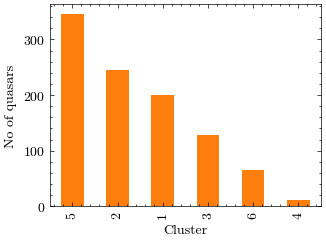

In [122]:
SOM_Clusters_Histogram(clus_5,'tab:orange')

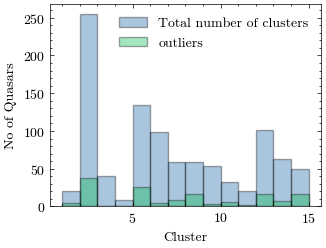

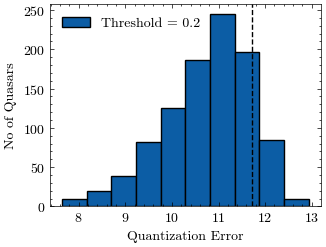

In [100]:
outliers_detection(clus,som,scaled_curves,ids)

Creating Plots: 100%|████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.89s/it]


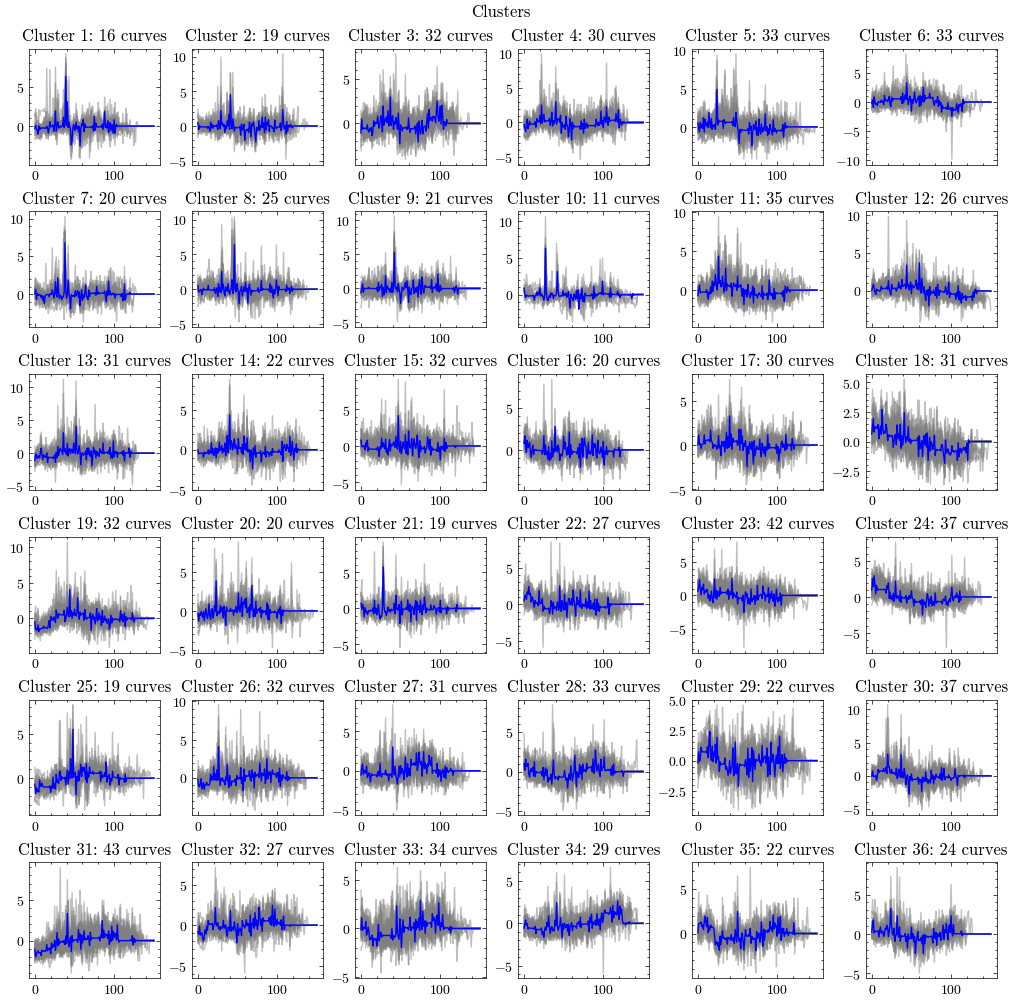

In [58]:
Plot_SOM_Scaled_Average(som,scaled_curves)

In [5]:
plotStarburstMap(som_model)

In [104]:
plotStarburstMap(som_2)